# Problem Statement:
A dataset collected in a cosmetics shop showing details of customers and whether or not they
responded to a special offer to buy a new lip-stick is shown in table below. Use this dataset to
build a decision tree, with Buys as the target variable, to help in buying lip-sticks in the future.
Find the root node of decision tree. According to the decision tree you have made from
previous training data set, what is the decision for the test data: [Age < 21, Income = Low,
Gender = Female, Marital Status = Married]?

In [1]:
import numpy as np
import pandas as pd

In [2]:
data=pd.read_csv("sales.csv")  #P.s. Check dataset values with problem statement input
data

,Age,Income,Gender,MaritialStatus,Buys
0,<21,High,Male,Single,No
1,<21,High,Male,Married,No
2,21-35,High,Male,Single,Yes
3,>35,Medium,Male,Single,Yes
4,>35,Low,Female,Single,Yes
5,>35,Low,Female,Married,No
6,21-35,Low,Female,Married,Yes
7,<21,Medium,Male,Single,No
8,<21,Low,Female,Married,Yes
9,>35,Medium,Female,Single,Yes


In [3]:
data.describe()

,Age,Income,Gender,MaritialStatus,Buys
count,14,14,14,14,14
unique,3,3,2,2,2
top,<21,Medium,Male,Single,Yes
freq,5,6,7,7,9


In [4]:
#data.groupby('Age').count()

In [5]:
#data.apply(pd.value_counts)
data['Buys'].value_counts()

Yes    9
No     5
Name: Buys, dtype: int64

In [6]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder();
#data=data.apply(le.fit_transform)
x=data.iloc[:,:-1] #-1 means don't take last column 
x=x.apply(le.fit_transform)
#find label with their encoded value
print("Age with encoded value :",list( zip(data.iloc[:,0], x.iloc[:,0])))
print("\nIncome with encoded value :",list( zip(data.iloc[:,1], x.iloc[:,1])))
print("\nGender with encoded value :",list( zip(data.iloc[:,2], x.iloc[:,2])))
print("\nmaritialStatus with encoded value :",list( zip(data.iloc[:,3], x.iloc[:,3])))

Age with encoded value : [('<21', 1), ('<21', 1), ('21-35', 0), ('>35', 2), ('>35', 2), ('>35', 2), ('21-35', 0), ('<21', 1), ('<21', 1), ('>35', 2), ('<21', 1), ('21-35', 0), ('21-35', 0), ('>35', 2)]

Income with encoded value : [('High', 0), ('High', 0), ('High', 0), ('Medium', 2), ('Low', 1), ('Low', 1), ('Low', 1), ('Medium', 2), ('Low', 1), ('Medium', 2), ('Medium', 2), ('Medium', 2), ('High', 0), ('Medium', 2)]

Gender with encoded value : [('Male', 1), ('Male', 1), ('Male', 1), ('Male', 1), ('Female', 0), ('Female', 0), ('Female', 0), ('Male', 1), ('Female', 0), ('Female', 0), ('Female', 0), ('Male', 1), ('Female', 0), ('Male', 1)]

maritialStatus with encoded value : [('Single', 1), ('Married', 0), ('Single', 1), ('Single', 1), ('Single', 1), ('Married', 0), ('Married', 0), ('Single', 1), ('Married', 0), ('Single', 1), ('Married', 0), ('Married', 0), ('Single', 1), ('Married', 0)]


In [7]:
#Store labels in Y
y=data.iloc[:,-1]

In [8]:
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier(criterion='entropy')
classifier.fit(x,y)

DecisionTreeClassifier(criterion='entropy')

In [9]:
#Predict value for the given Expression
#[Age < 21, Income = Low,Gender = Female, Marital Status = Married]
test_x=np.array([1,1,0,0])
pred_y=classifier.predict([test_x])
print("Predicted class for input [Age < 21, Income = Low,Gender = Female, Marital Status = Married]\n", test_x," is ",pred_y[0])

Predicted class for input [Age < 21, Income = Low,Gender = Female, Marital Status = Married]
 [1 1 0 0]  is  Yes


d:\College\BE\SEM2\LAB\TYPE3\LP3\ML\.venv\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


'dot' is not recognized as an internal or external command,
operable program or batch file.


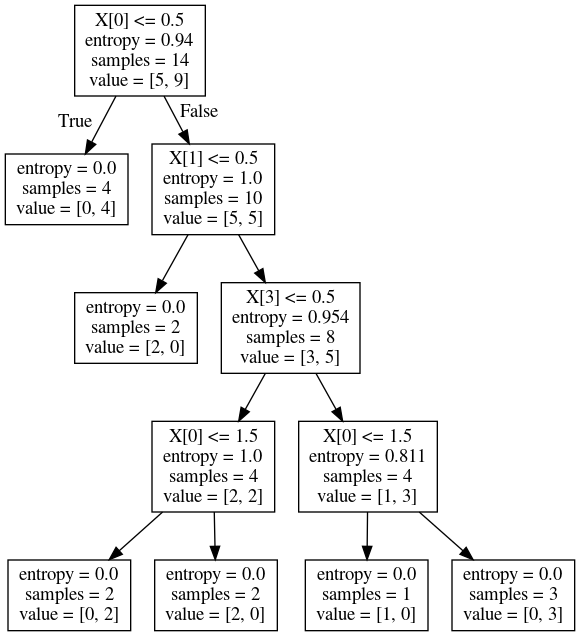

In [10]:
#method to generate graph p.s. needs dot utility installed in os
from sklearn.tree import export_graphviz
from IPython.display import Image
export_graphviz(classifier,out_file="data.dot",feature_names=x.columns,class_names=["No","Yes"])
#you need to install graphviz in fedora(IN LAB) for running below dor command
#yum install graphviz

#then go to terminal and cd to directory where you are saving jupyter notebook
# and execute below command
#    dot -Tpng data.dot -o tree.png
  
    
!dot -Tpng data.dot -o tree.png
Image("tree.png")

In [11]:
#End of PROGRAM

In [12]:
from sklearn.externals.six import StringIO
import pydotplus as pdd
from IPython.display import Image
from sklearn.tree import export_graphviz

dot_dat=export_graphviz(classifier,out_file=None,feature_names=x.columns,class_names=["No","Yes"])
graph=pdd.graph_from_dot_data(dot_dat)
graph.write_png("tree.png")
Image(graph.create_jpg())

ModuleNotFoundError: No module named 'sklearn.externals.six'

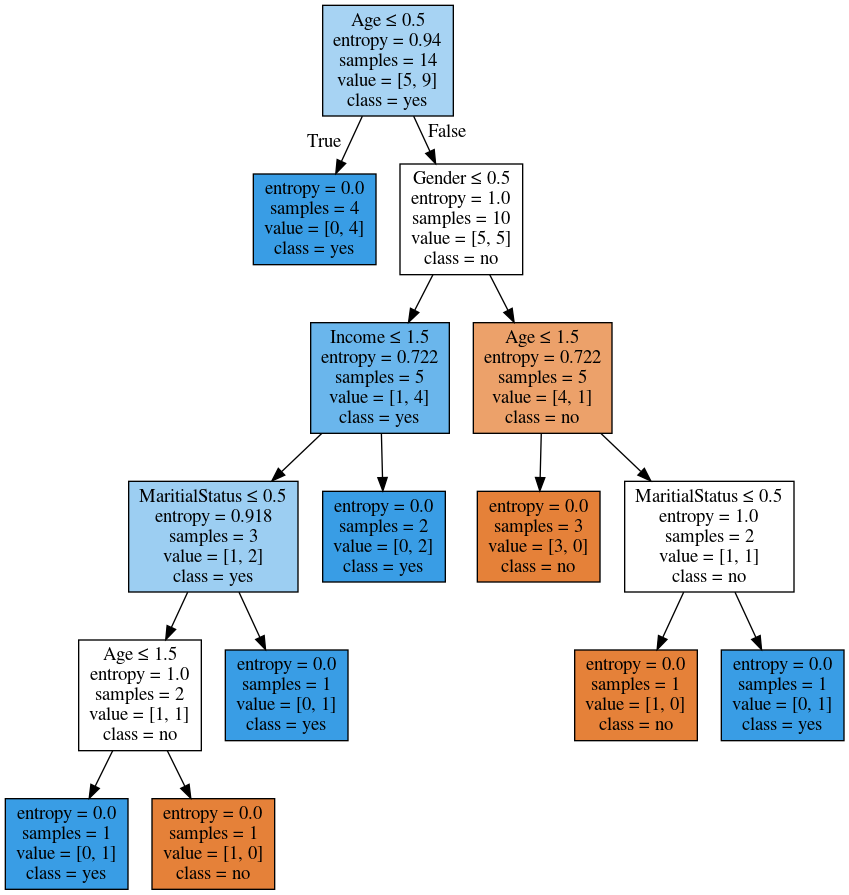

In [ ]:
#method 3
import pydotplus as pdd
from IPython.display import Image
dot_data = export_graphviz(classifier, out_file=None,feature_names=x.columns,class_names=['no', 'yes'], filled = True,special_characters=True)

graph = pdd.graph_from_dot_data(dot_data)  

Image(graph.create_png())
graph.write_png("dtree.png")
Image(graph.create_png())

In [ ]:
#run below command to install graphviz
# !pip install graphviz

In [ ]:
#No need to implement below code
#if you want to split into train test set
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
train,test=train_test_split(data.apply(le.fit_transform),test_size=0.14,random_state=0)
train_x=train.iloc[:,:-1]
train_y=train.iloc[:,-1]
test_x=test.iloc[:,:-1]
test_y=test.iloc[:,-1]
clf=DecisionTreeClassifier(criterion='entropy')
clf.fit(train_x,train_y)
pred_y=clf.predict(test_x)
accuracy=accuracy_score(test_y,pred_y)
accuracy*100

100.0

In [ ]:
test

,Age,Income,Gender,MaritialStatus,Buys
8,1,1,0,0,1
6,0,1,0,0,1


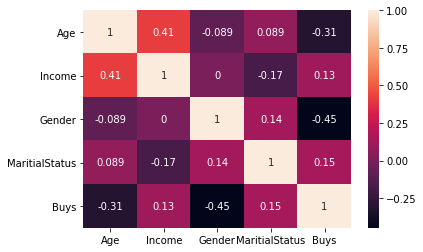

In [ ]:
#just displaying correlation between fields
import seaborn as sns
corr=data.apply(le.fit_transform).corr();
sns.heatmap(corr,annot=True)